In [6]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
time_series = pd.read_csv("../data/NFT_Time_Series.csv")
time_series.rename(columns = {'Date':'ds', 'Sales_USD':'y'}, inplace = True)
time_series.head()

,ds,Sales_USD_cumsum,Number_of_Sales_cumsum,Active_Market_Wallets_cumsum,Primary_Sales_cumsum,Secondary_Sales_cumsum,AverageUSD_cum,y,Number_of_Sales,Active_Market_Wallets,Primary_Sales
0,2017-06-22,0.00,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-06-23,1020.30,19,8.0,0,19.0,53.70,1020.30,19.0,8.0,0.0
2,2017-06-24,2261.14,40,21.0,0,21.0,56.53,1240.84,21.0,13.0,0.0
3,2017-06-25,2778.69,53,28.0,0,13.0,52.43,517.55,13.0,7.0,0.0
4,2017-06-26,3203.32,67,34.0,0,14.0,47.81,424.63,14.0,6.0,0.0


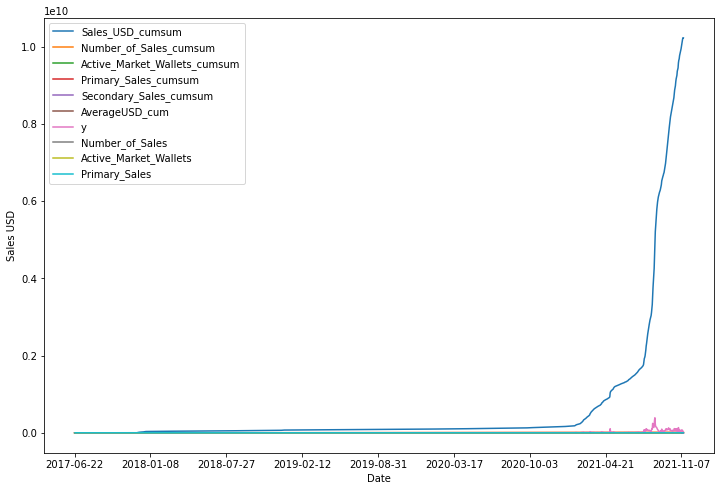

In [8]:
ax = time_series.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Sales USD')
ax.set_xlabel('Date')

plt.show()

In [9]:
model = Prophet(interval_width=0.95)
model.fit(time_series)

future_dates = model.make_future_dataframe(periods=36, freq='MS')
future_dates.head()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Zoe Greenwald\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


,ds
0,2017-06-22
1,2017-06-23
2,2017-06-24
3,2017-06-25
4,2017-06-26


In [10]:
forecast = model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
forecast.head()

C:\Users\Zoe Greenwald\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\Zoe Greenwald\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-06-22,-1.728186e+06,-4.087637e+07,2.267793e+07,-1.728186e+06,-1.728186e+06,-7.305306e+06,-7.305306e+06,-7.305306e+06,-797800.393587,-797800.393587,-797800.393587,-6.507506e+06,-6.507506e+06,-6.507506e+06,0.0,0.0,0.0,-9.033492e+06
1,2017-06-23,-1.722014e+06,-4.126251e+07,2.317693e+07,-1.722014e+06,-1.722014e+06,-7.341657e+06,-7.341657e+06,-7.341657e+06,-653077.291387,-653077.291387,-653077.291387,-6.688580e+06,-6.688580e+06,-6.688580e+06,0.0,0.0,0.0,-9.063671e+06
2,2017-06-24,-1.715842e+06,-4.213304e+07,2.547812e+07,-1.715842e+06,-1.715842e+06,-6.205959e+06,-6.205959e+06,-6.205959e+06,660366.556415,660366.556415,660366.556415,-6.866325e+06,-6.866325e+06,-6.866325e+06,0.0,0.0,0.0,-7.921800e+06
3,2017-06-25,-1.709670e+06,-4.116261e+07,2.606606e+07,-1.709670e+06,-1.709670e+06,-6.411789e+06,-6.411789e+06,-6.411789e+06,621353.173369,621353.173369,621353.173369,-7.033142e+06,-7.033142e+06,-7.033142e+06,0.0,0.0,0.0,-8.121459e+06
4,2017-06-26,-1.703498e+06,-4.165756e+07,2.413565e+07,-1.703498e+06,-1.703498e+06,-6.432288e+06,-6.432288e+06,-6.432288e+06,749458.222500,749458.222500,749458.222500,-7.181746e+06,-7.181746e+06,-7.181746e+06,0.0,0.0,0.0,-8.135786e+06


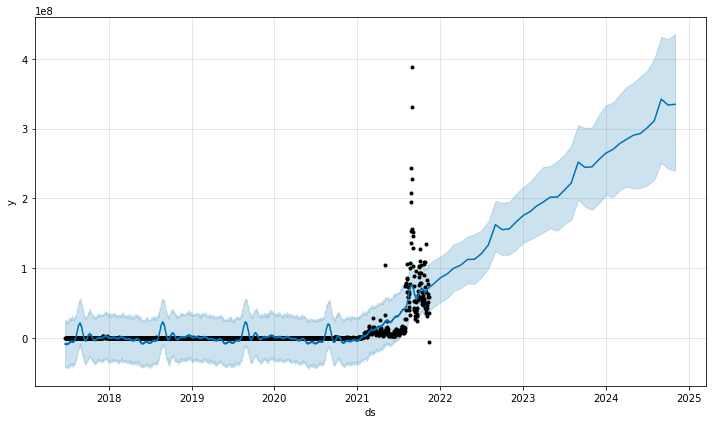

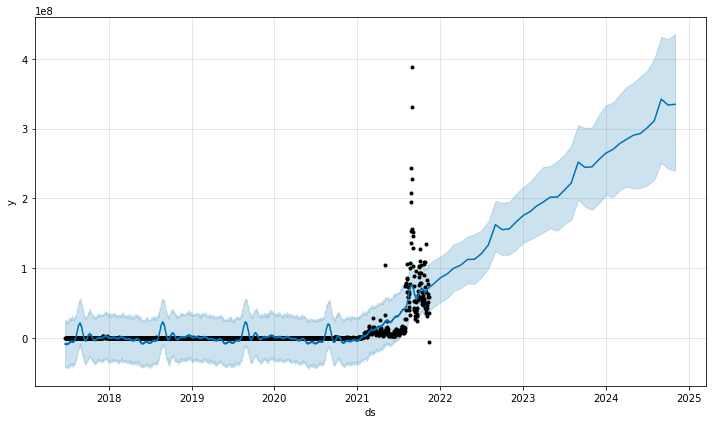

In [11]:
model.plot(forecast, uncertainty=True)

C:\Users\Zoe Greenwald\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\Zoe Greenwald\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


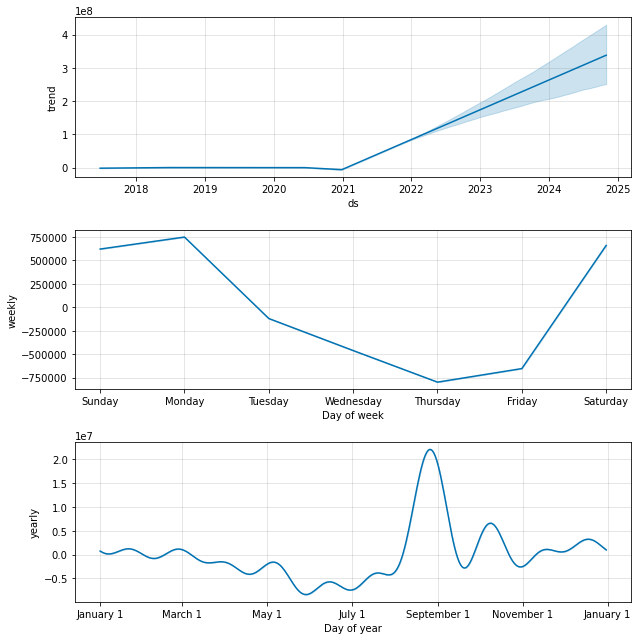

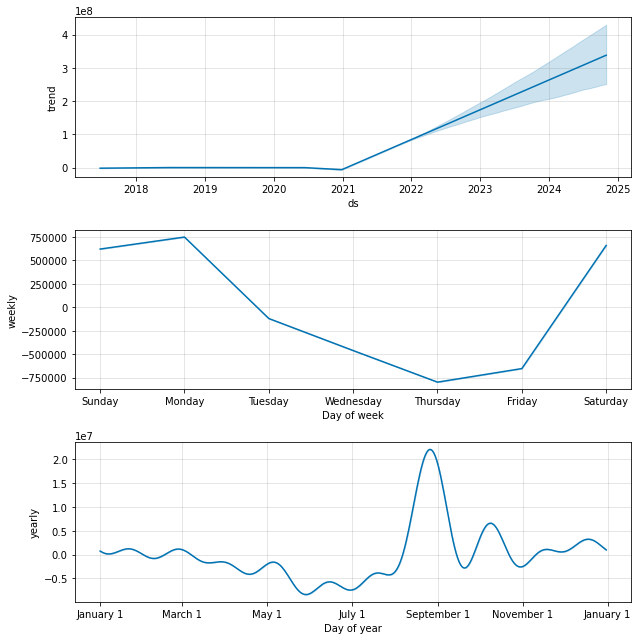

In [12]:
model.plot_components(forecast)

In [13]:
from prophet.plot import add_changepoints_to_plot

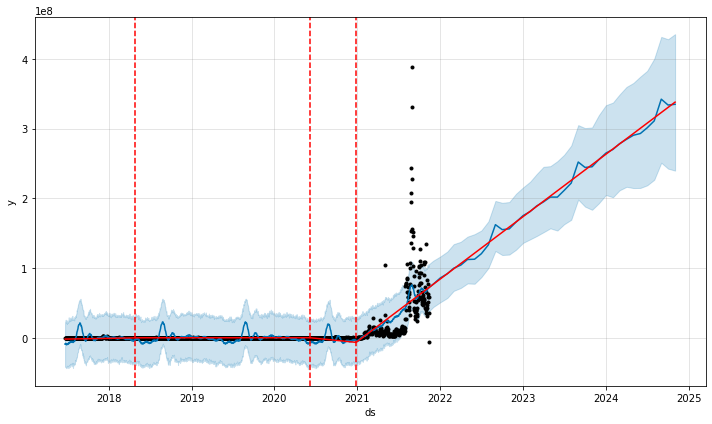

In [14]:
fig = model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model, forecast)

In [15]:
pre_covid = time_series.iloc[:1016,:]
post_covid = time_series.iloc[1016:,:]

,ds,Sales_USD_cumsum,Number_of_Sales_cumsum,Active_Market_Wallets_cumsum,Primary_Sales_cumsum,Secondary_Sales_cumsum,AverageUSD_cum,y,Number_of_Sales,Active_Market_Wallets,Primary_Sales
1011,2020-03-28,1.036623e+08,4406163,152671.0,2835716,5312.0,23.53,72831.83,8626.0,90.0,3314.0
1012,2020-03-29,1.037140e+08,4412086,152720.0,2838999,2640.0,23.51,51681.42,5923.0,49.0,3283.0
1013,2020-03-30,1.037816e+08,4417367,152984.0,2841483,2797.0,23.49,67614.46,5281.0,264.0,2484.0
1014,2020-03-31,1.042617e+08,4434242,153299.0,2855889,2469.0,23.51,480104.11,16875.0,315.0,14406.0
1015,2020-04-01,1.043470e+08,4441451,153514.0,2858457,4641.0,23.49,85311.31,7209.0,215.0,2568.0


In [16]:
from sklearn.model_selection import train_test_split

In [19]:
post_c_attrs = post_covid.ds
post_c_labels = post_covid.y

post_c_f_train, post_c_f_test, post_c_l_train, post_c_l_test = train_test_split(post_c_attrs, post_c_labels, test_size=0.33, shuffle=False)


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


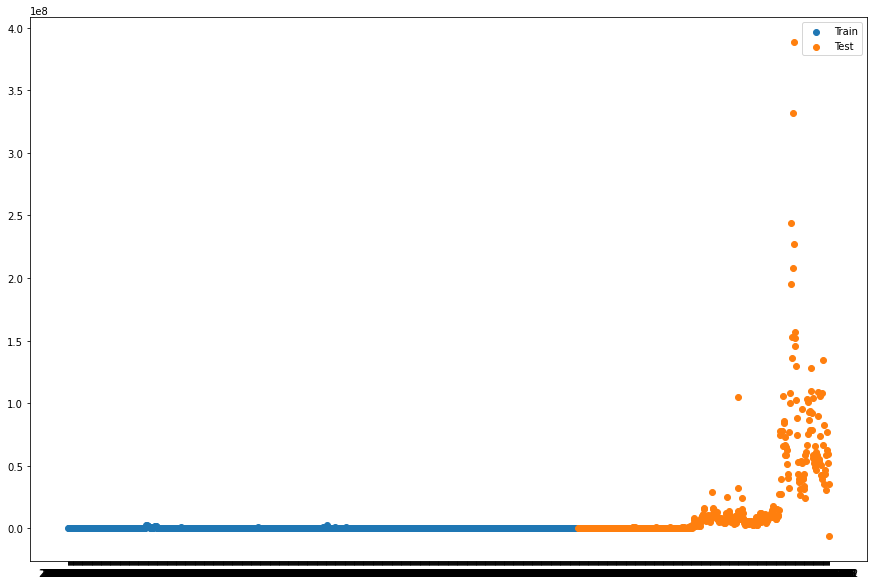

In [17]:
attrs = time_series.ds
labels = time_series.y

features_train, features_test, labels_train, labels_test = train_test_split(attrs, labels, test_size=0.33, shuffle=False)

plt.figure(figsize=(15, 10))
plt.scatter(features_train, labels_train)
plt.scatter(features_test, labels_test)
plt.legend(["Train", "Test"])

To do: overall goal see how long w can gt it to accurantly predict into the future. Next steps do that, split the data by weeks, months, years. Then run all of above on the train. Start predicitng for a week then more slolwy and see how accursnlty it predicts into thr future.

C:\Users\Zoe Greenwald\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\Zoe Greenwald\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


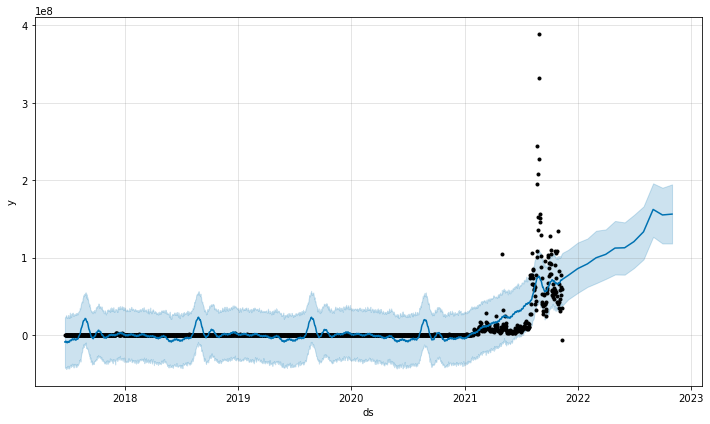

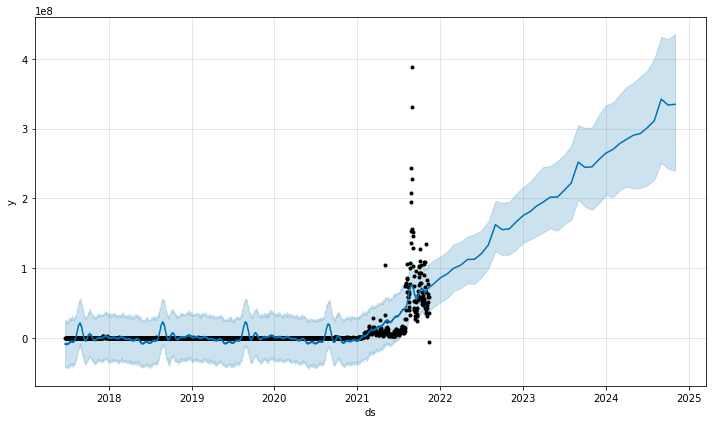

In [18]:
f = model.make_future_dataframe(periods=12, freq='MS')

fc = model.predict(f)

fig = model.plot(fc)
fig = model.plot(forecast)